`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Fandangos Ratings and its database

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## Getting graphic analysis

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

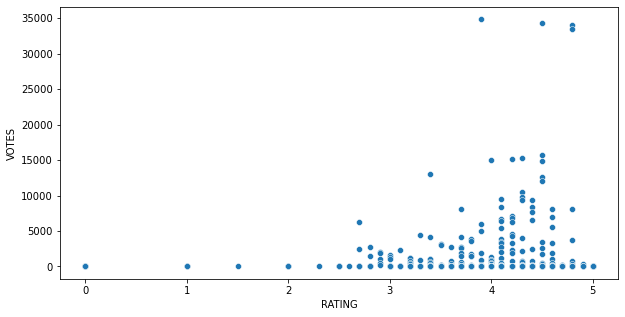

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=fandango, y = 'VOTES', x = 'RATING')


In [11]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


#### Doing a little more format

In [9]:
 fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1])


In [10]:
fandango['YEAR'].value_counts()

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

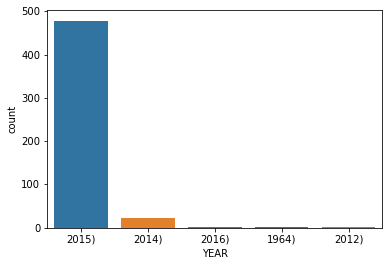

In [29]:
sns.countplot(x=fandango['YEAR'])

### Movies with higher votes

In [33]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


### Movies with zero votes

In [36]:
no_votes = fandango['VOTES'] ==0
no_votes.sum()

69

### Dataframe cleaned of movies with zero votes

In [11]:
fanReviewed = fandango[fandango['VOTES']>0]
fanReviewed


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015)
431,The Intern (2015),5.0,5.0,1,2015)
432,The Park Bench (2015),5.0,5.0,1,2015)
433,The Wanted 18 (2015),5.0,5.0,1,2015)


### Cheking if the stars display  are different of the real rating

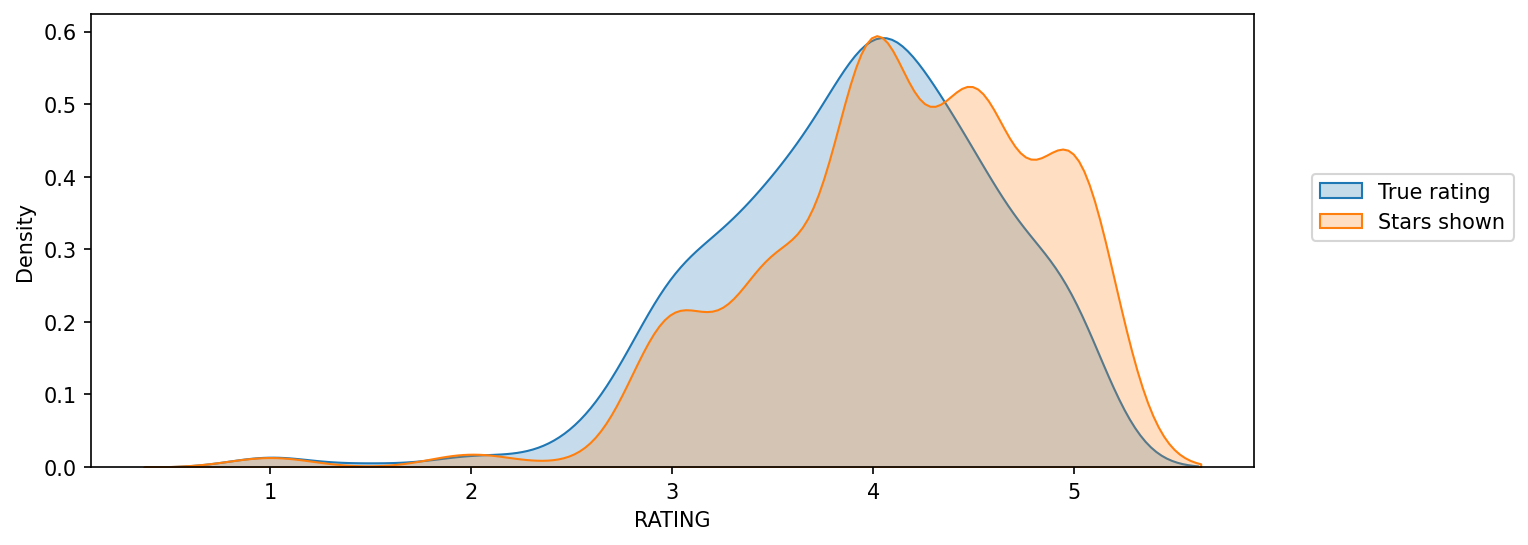

In [45]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data = fanReviewed,x='RATING', fill=True, label='True rating')
sns.kdeplot(data = fanReviewed,x='STARS', fill=True, label='Stars shown')
plt.legend(loc=(1.05,.5))

### Relation Stars-True rating

In [51]:
fanReviewed['STARS_DIFF'] = fanReviewed['STARS']-fanReviewed['RATING']
fanReviewed['STARS_DIFF'] = fanReviewed['STARS_DIFF'].round(2)

C:\Users\alemu\AppData\Local\Temp\ipykernel_23952\2503234005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fanReviewed['STARS_DIFF'] = fanReviewed['STARS']-fanReviewed['RATING']
C:\Users\alemu\AppData\Local\Temp\ipykernel_23952\2503234005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fanReviewed['STARS_DIFF'] = fanReviewed['STARS_DIFF'].round(2)


In [52]:
fanReviewed.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0


<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

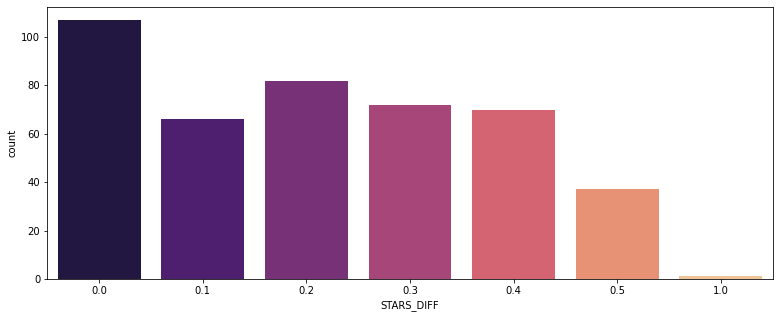

In [57]:
plt.figure(figsize=(13,5))
sns.countplot(data = fanReviewed,x='STARS_DIFF', palette = 'magma' )

### Movie with a complete star difference

In [58]:
fanReviewed[fanReviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


# Comparing this ratings with other sites ratings

In [12]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [13]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Checking Rotten Tomatoes

(0.0, 100.0)

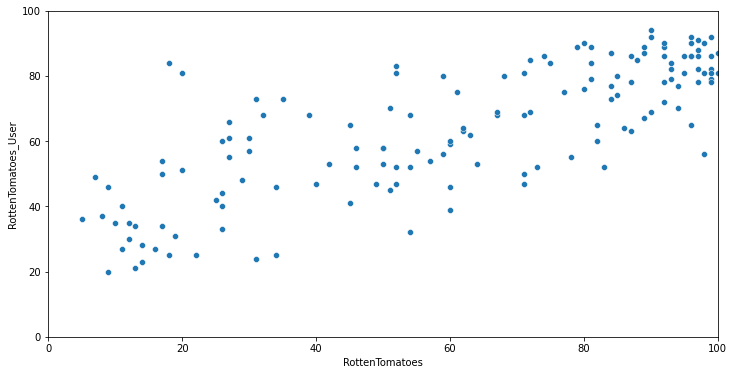

In [67]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=all_sites,y='RottenTomatoes_User', x='RottenTomatoes')
plt.ylim(0,100)
plt.xlim(0,100)

### Relation Rotten Tomatoes- Rotten Tomatoes Critics

In [14]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


### checking the mean

In [70]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

(-70.0, 50.0)

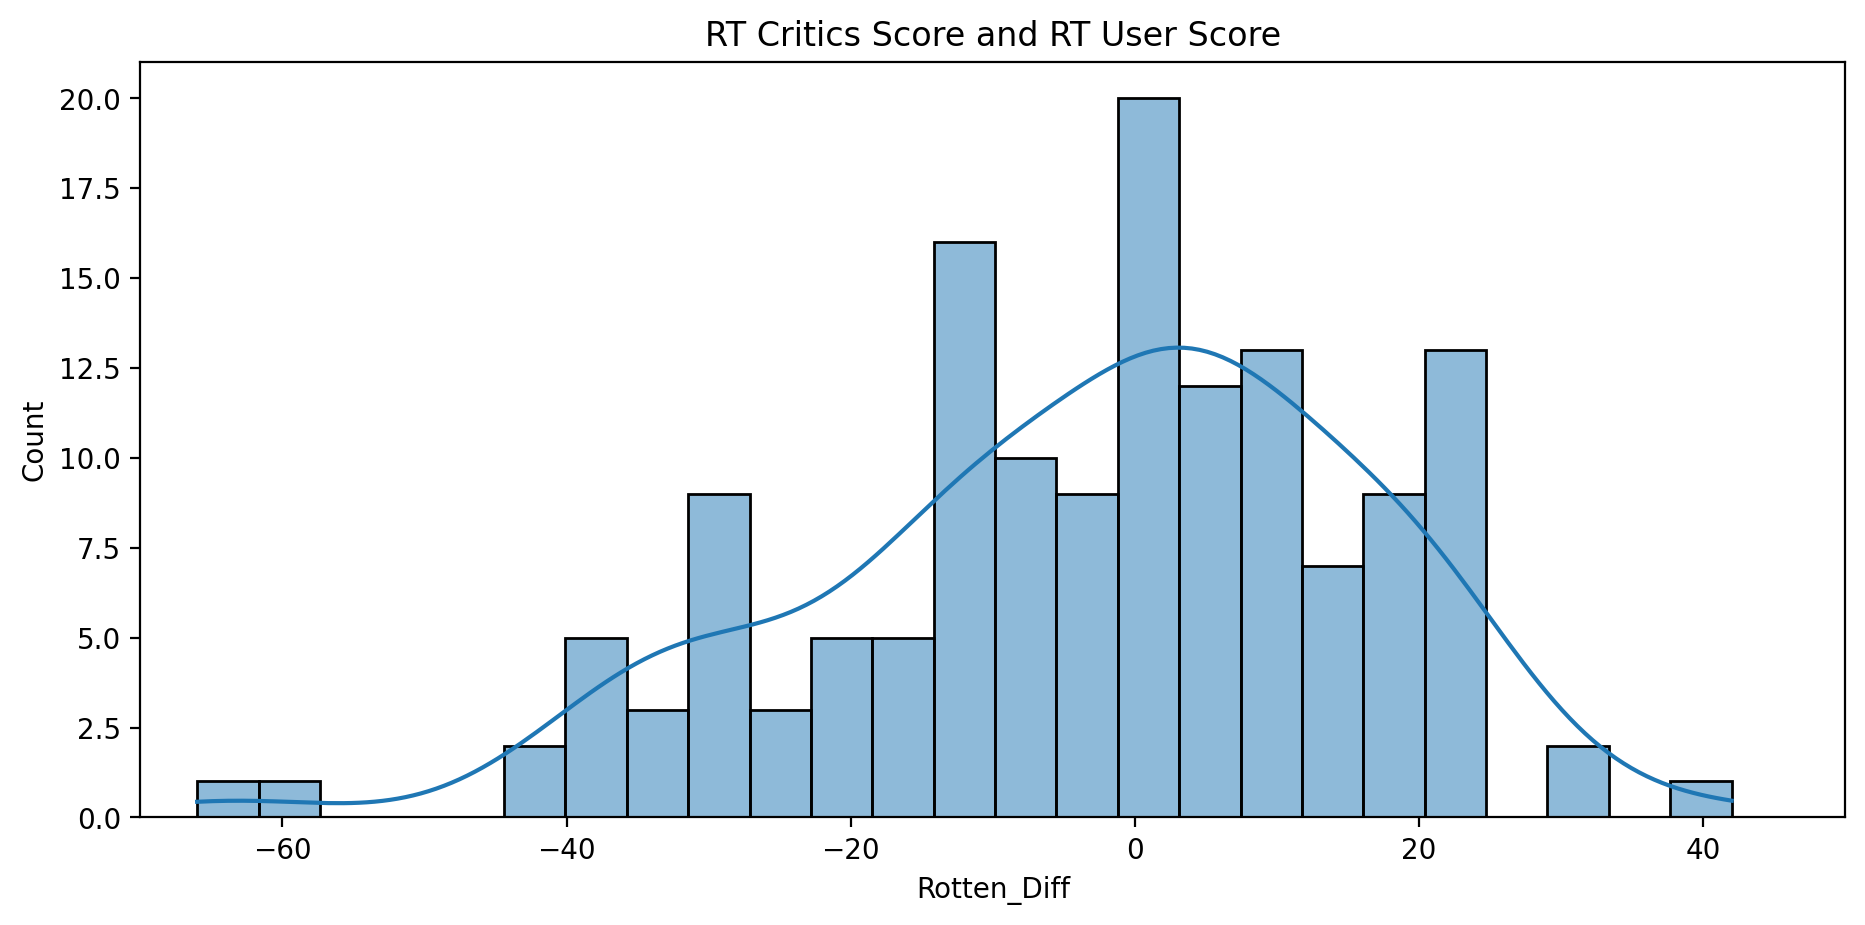

In [78]:
plt.figure(figsize=(11,5), dpi=200)
sns.histplot(data=all_sites, x= 'Rotten_Diff',kde = True, bins=25)

plt.title('RT Critics Score and RT User Score')
plt.xlim(-70,50)


Text(0.5, 1.0, 'RT Critics Score and RT User Score')

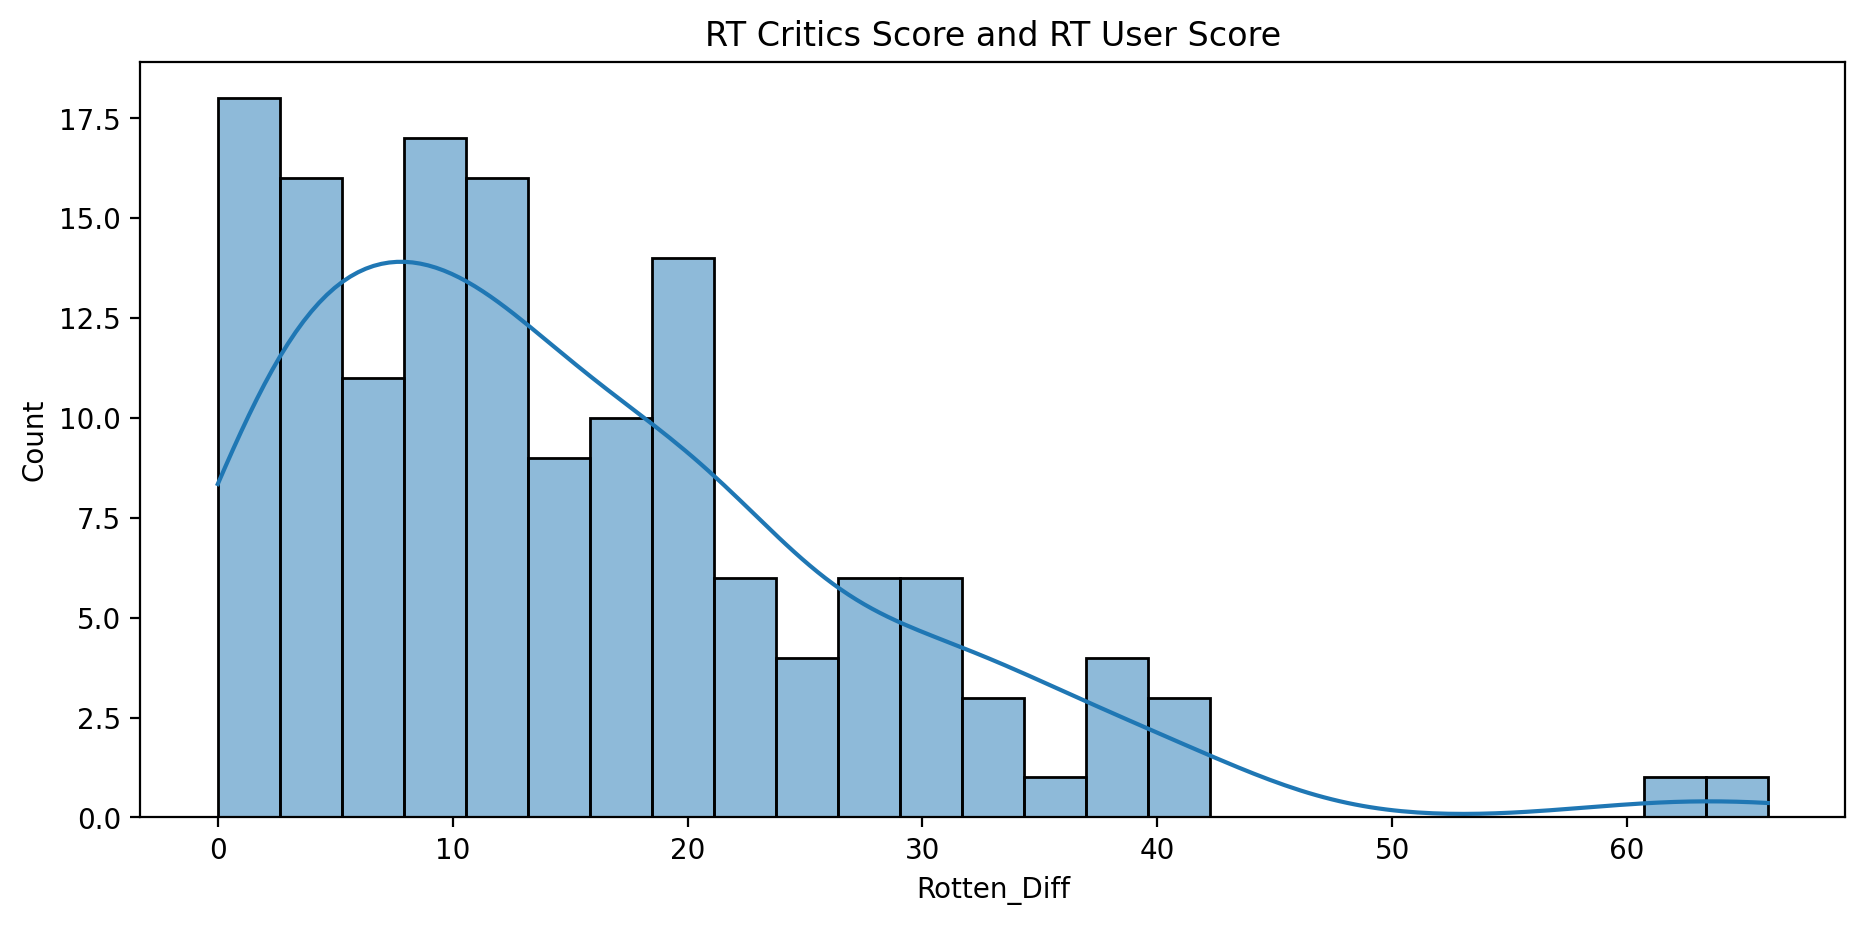

In [79]:
plt.figure(figsize=(11,5), dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs) ,kde = True, bins=25)

plt.title('RT Critics Score and RT User Score')

### Movies that causes the biggers differences

In [81]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [82]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### Cheking Metacritic

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

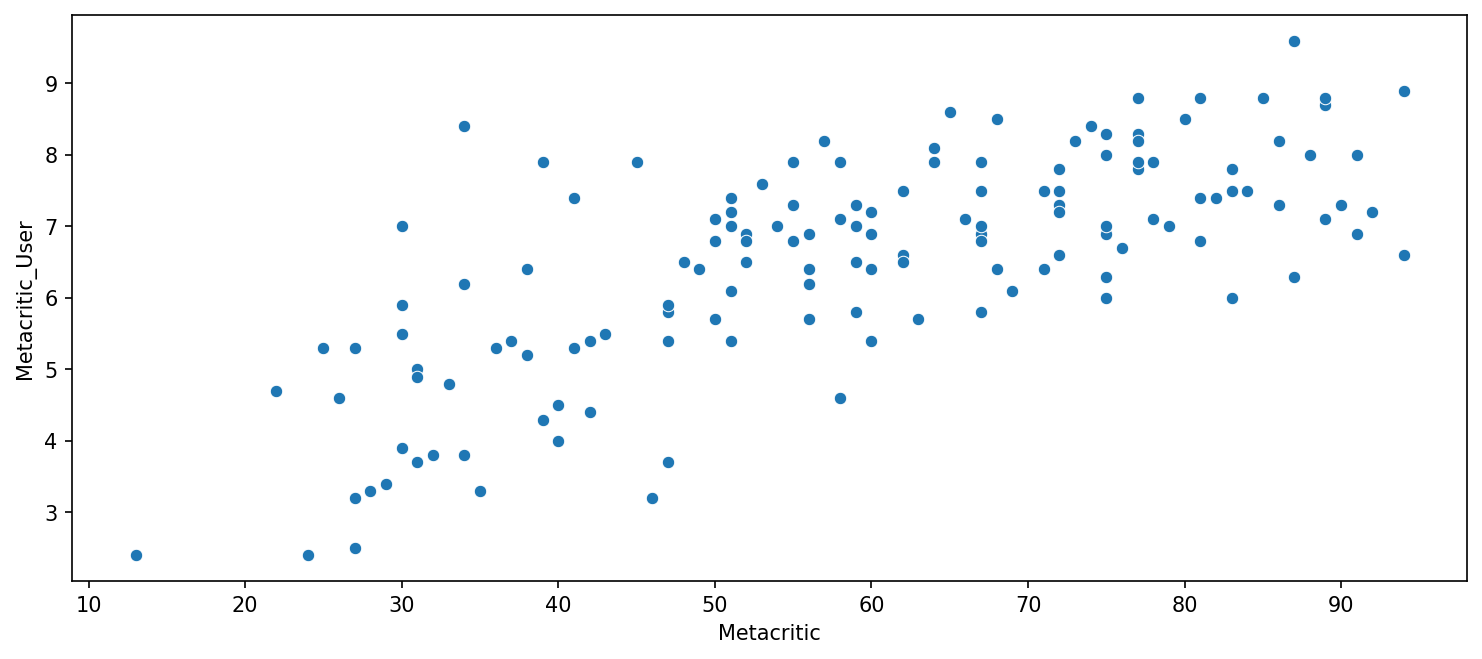

In [85]:
plt.figure(figsize=(12,5),dpi =150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')

### Cheking IMDB

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

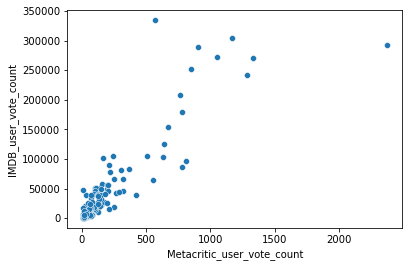

In [87]:
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

### Movie with higher User Vote Count (IMDB)

In [16]:
all_sites [all_sites['IMDB_user_vote_count']==all_sites['IMDB_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


### Movie with higher User Vote Count (Metacritic)

In [17]:
all_sites [all_sites['Metacritic_user_vote_count']==all_sites['Metacritic_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


###  Relation Fandango-All sites

In [19]:
df = pd.merge(fandango, all_sites,on='FILM', how='inner')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Getting them in the same format

In [24]:
df['RT_NORM'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_NORM'] = np.round(df['RottenTomatoes_User']/20,1)

In [38]:
df['META_NORM'] = np.round(df['Metacritic']/20,1)
df['METAU_NORM'] = np.round(df['Metacritic_User']/2,1)
df['IMDB_NORM'] = np.round(df['IMDB']/2,1)

In [27]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_NORM,RTU_NORM,META_NORM,METAU_NORM,IMDB_NORM
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,0.2,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,0.4,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,0.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,0.3,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,0.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015),87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,0.3,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015),95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,0.3,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015),93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,0.4,3.9
143,Tangerine (2015),4.0,3.9,36,2015),95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,0.4,3.7


In [39]:
norm_scores = df[['STARS','RATING','RT_NORM', 'RTU_NORM','META_NORM','METAU_NORM','IMDB_NORM']]
norm_scores

,STARS,RATING,RT_NORM,RTU_NORM,META_NORM,METAU_NORM,IMDB_NORM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [29]:
norm_scores.head()

,STARS,RATING,RT_NORM,RTU_NORM,META_NORM,METAU_NORM,IMDB_NORM
0,4.0,3.9,1.2,2.1,2.3,0.2,2.1
1,4.5,4.5,3.6,4.0,3.0,0.4,3.6
2,5.0,4.8,3.6,4.2,3.6,0.3,3.7
3,5.0,4.8,4.0,4.2,3.4,0.3,3.7
4,4.5,4.5,4.9,4.5,4.7,0.4,4.3


### Comparing Distribution of Scores 

In [33]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

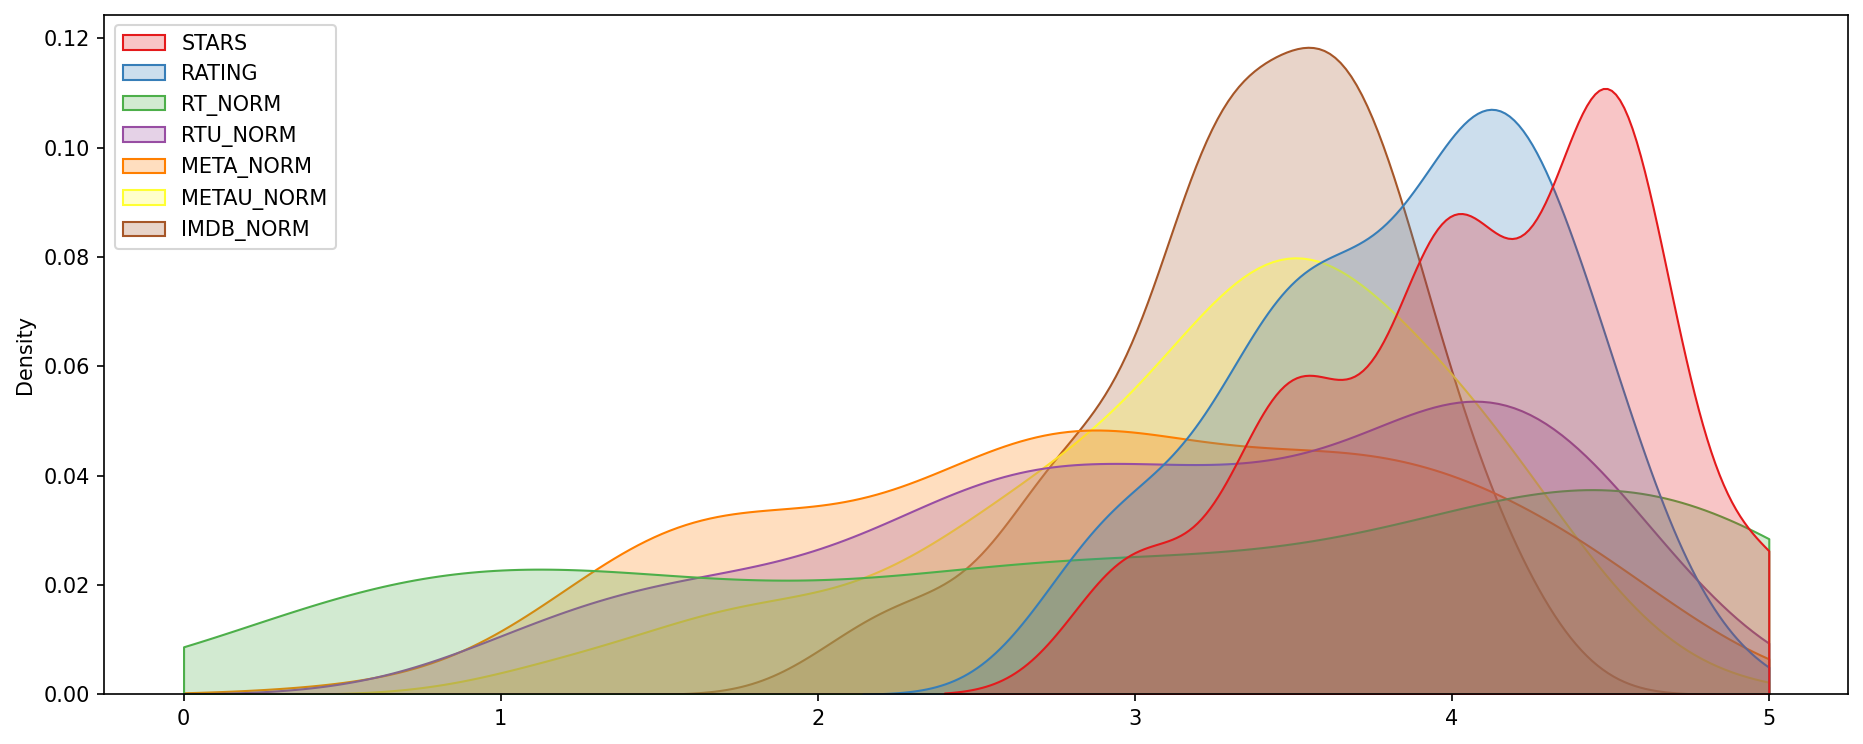

In [40]:
fig, ax  = plt.subplots(figsize=(15,6),dpi= 150)
sns.kdeplot(data= norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax,"upper left")

### We can see the uneven distribution

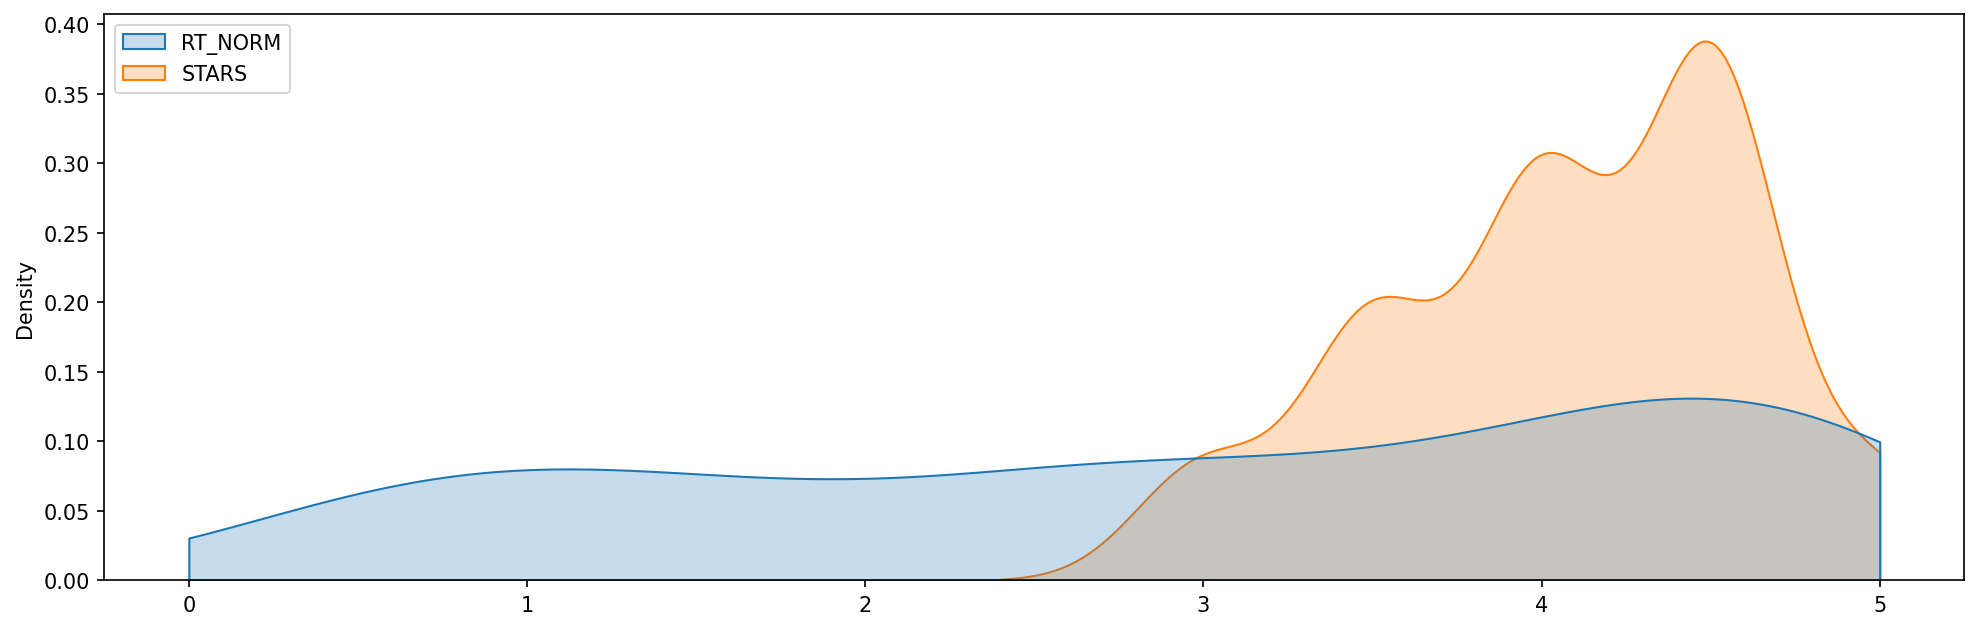

In [46]:
RTFAN=norm_scores[['RT_NORM','STARS']]
fig, ax = plt.subplots(figsize=(16,5),dpi=150)
sns.kdeplot(data=RTFAN, shade=True,clip=[0,5], ax=ax)

move_legend(ax,"upper left")

<AxesSubplot:ylabel='Count'>

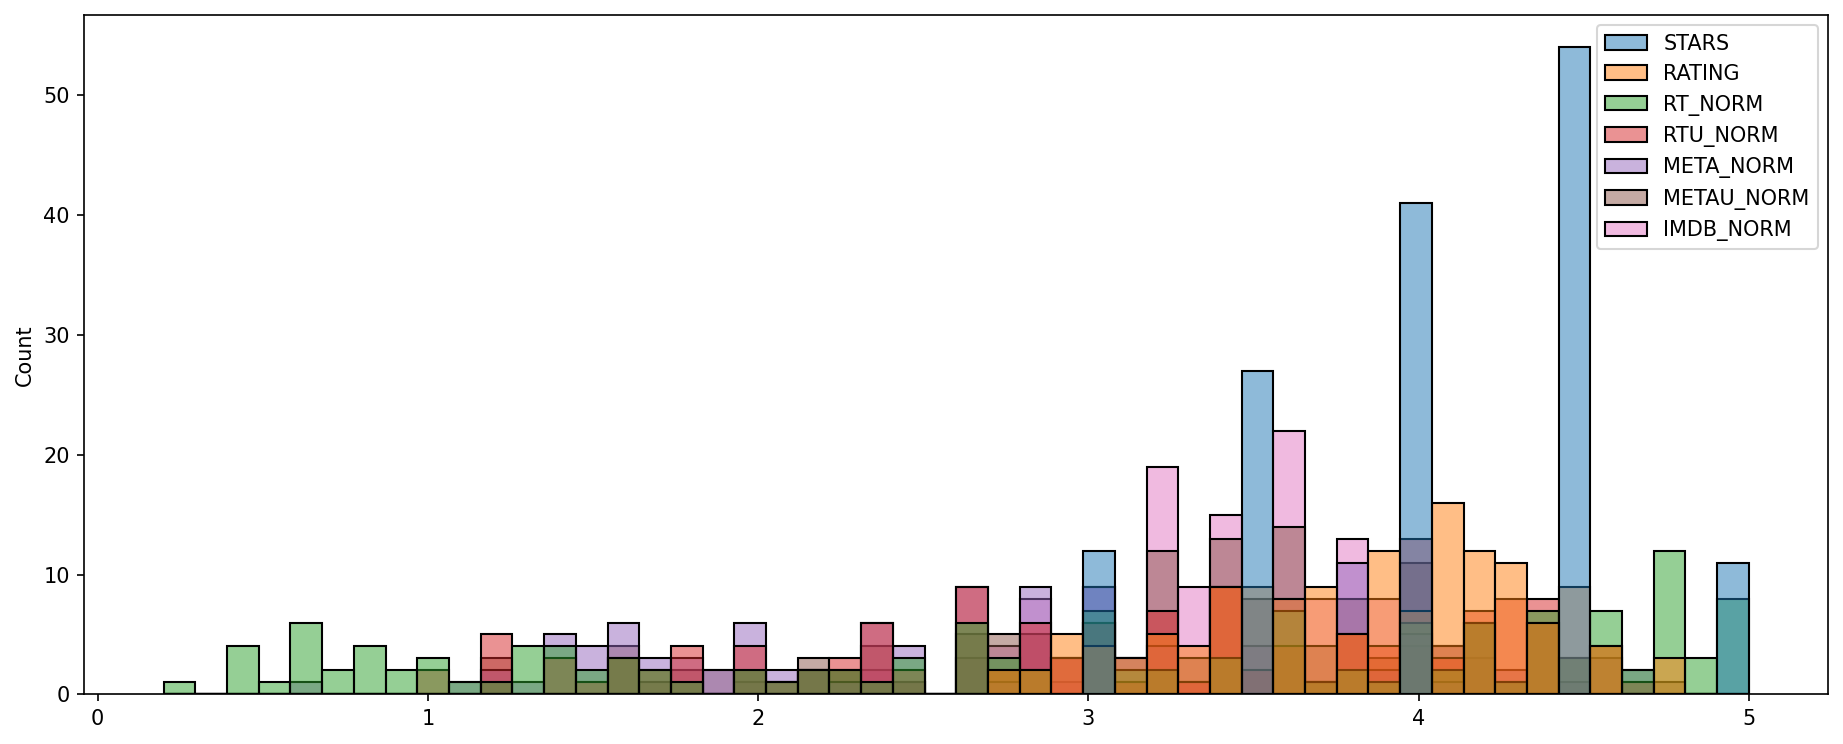

In [53]:
plt.figure(figsize=(15,6),dpi=150)
sns.histplot(data=norm_scores,bins=50)



### Movies with worst ratings

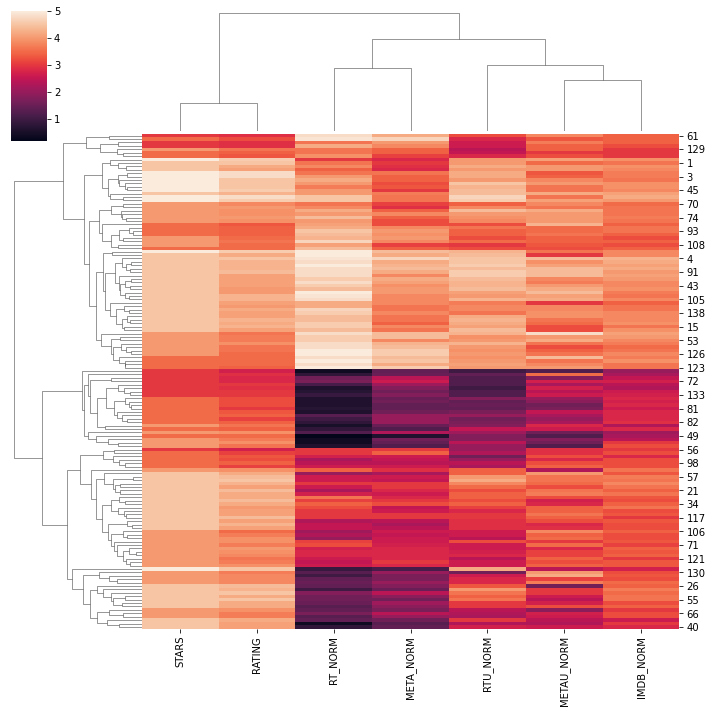

In [54]:
sns.clustermap(data=norm_scores)

### You can see how fandango is clearly rating movies higher

In [55]:
norm_scores.nsmallest(10,'RT_NORM')

,STARS,RATING,RT_NORM,RTU_NORM,META_NORM,METAU_NORM,IMDB_NORM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7


In [57]:
norm_films = df[['STARS','RATING','RT_NORM','RTU_NORM','META_NORM','METAU_NORM','IMDB_NORM','FILM']]
norm_films.nsmallest(10,'RT_NORM')

,STARS,RATING,RT_NORM,RTU_NORM,META_NORM,METAU_NORM,IMDB_NORM,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


### Checking distribution of top 10 worst movies

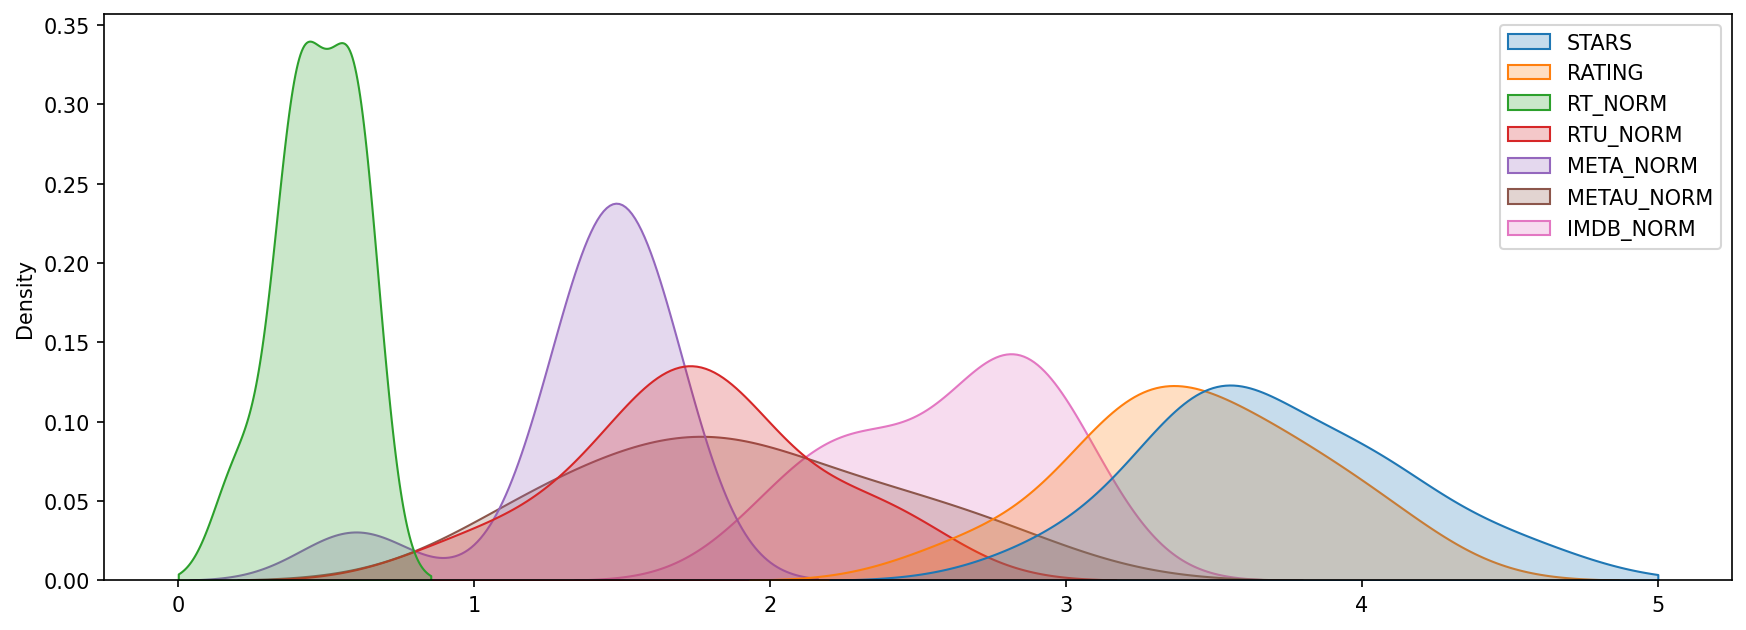

In [58]:
fig, ax = plt.subplots(figsize=(14,5),dpi=150)
sns.kdeplot(data=norm_films.nsmallest(10,'RT_NORM'),shade=True, clip=[0,5],ax=ax)
move_legend(ax, 'upper right')

----